# <span style='color:blue'> Introduction</span>

**MNIST** ("Modified National Institute of Standards and Technology") is the de facto “Hello World” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

The MNIST database contains 60,000 training images and 10,000 testing images


# Importing necessary library

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install tensorflow-datasets

In [3]:
import tensorflow_datasets as tfds        # importing tensorflow dataset

In [4]:
tfds

<module 'tensorflow_datasets' from 'C:\\Users\\ajay2\\anaconda3\\lib\\site-packages\\tensorflow_datasets\\__init__.py'>

In [5]:
# loading the mnist data set.

mnist_dataset, mnist_info= tfds.load(name='mnist', as_supervised=True, with_info=True)   

# with 'as_supervised=True, will load the dataset in a 2-tuple structure (input, target)
# with_info=True will also provide us with a tuple containing information about the version, features, number of samples

In [6]:
mnist_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='~\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

# Loading and Pre-Processing the data

In [7]:
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']
# by default, TF has training and testing datasets, but no validation sets.
# So we will split on our own to create validation data.

num_validation_samples= 0.1*mnist_info.splits['train'].num_examples     # 10% of data set for validation purpose.
num_validation_samples = tf.cast(num_validation_samples, tf.int64)      # casting numbers into integer, tu avoid any errors.

num_test_samples =mnist_info.splits['test'].num_examples          # Storing test samples.
num_test_samples = tf.cast(num_test_samples, tf.int64)

def scale(image, label):                     # 'scale' will take an MNIST image and its label.
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image,label

scaled_train_and_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)

BUFFER_SIZE = 10000        # defining buffer size

shuffled_train_and_validation_data= scaled_train_and_validation_data.shuffle(BUFFER_SIZE)     # shuffling the data

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)

train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE= 100                   # defining the batch size

train_data=train_data.batch(BATCH_SIZE)                # batching the train data

test_data= test_data.batch(num_test_samples)           # batching the test data

validation_data= validation_data.batch(num_validation_samples) 

validation_inputs, validation_targets = next(iter(validation_data))

# MODEL

**Outline the model**

In [8]:
input_size = 784                           # defining number of inputs  
output_size = 10                           # defining number of outputs
hidden_layer_size = 50                     # defining hidden layers in the neural network.
model= tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28,1)),                     # input layer
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'),        # 1st hidden layer
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'),        # 2nd hidden layer
                             tf.keras.layers.Dense(output_size, activation = 'softmax')          # output layer
                            ])


# Choose the optimizer and the Loss function

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training

In [10]:
NUM_EPOCHS = 10

history= model.fit(train_data, epochs= NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose=2)

Epoch 1/10
540/540 - 1s - loss: 0.4118 - accuracy: 0.8822 - val_loss: 0.2124 - val_accuracy: 0.9377 - 1s/epoch - 3ms/step
Epoch 2/10
540/540 - 1s - loss: 0.1797 - accuracy: 0.9478 - val_loss: 0.1598 - val_accuracy: 0.9520 - 872ms/epoch - 2ms/step
Epoch 3/10
540/540 - 1s - loss: 0.1389 - accuracy: 0.9590 - val_loss: 0.1326 - val_accuracy: 0.9600 - 837ms/epoch - 2ms/step
Epoch 4/10
540/540 - 1s - loss: 0.1138 - accuracy: 0.9670 - val_loss: 0.1164 - val_accuracy: 0.9680 - 819ms/epoch - 2ms/step
Epoch 5/10
540/540 - 1s - loss: 0.0972 - accuracy: 0.9711 - val_loss: 0.1045 - val_accuracy: 0.9695 - 745ms/epoch - 1ms/step
Epoch 6/10
540/540 - 1s - loss: 0.0831 - accuracy: 0.9755 - val_loss: 0.0897 - val_accuracy: 0.9738 - 762ms/epoch - 1ms/step
Epoch 7/10
540/540 - 1s - loss: 0.0737 - accuracy: 0.9775 - val_loss: 0.0889 - val_accuracy: 0.9737 - 805ms/epoch - 1ms/step
Epoch 8/10
540/540 - 1s - loss: 0.0675 - accuracy: 0.9801 - val_loss: 0.0800 - val_accuracy: 0.9753 - 802ms/epoch - 1ms/step
Epo

# TEST

In [11]:
test_loss, test_accuracy = model.evaluate(test_data)

1/1 [==============================] - 0s 113ms/step - loss: 0.0943 - accuracy: 0.9724


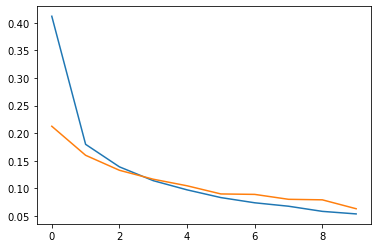

In [12]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

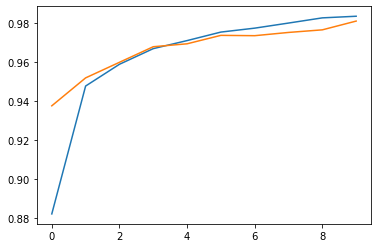

In [13]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

# <span style='color:red'>Result:</span>
The test predictions generated by our model predicts with an accuracy score of **97.24%**